In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Первые 5 строк:")
print(df.head())

print("Последние 5 строк:")
print(df.tail())

print("Структура данных:")
print(f"Размер датасета: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

print("Информация о типах данных:")
print(df.info())

print("Проверка типов данных:")
print(df.dtypes)

print("ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")

missing_values = df.isnull().sum()
missing_df = pd.DataFrame({
    'Количество пропусков': missing_values})
print("\nПропуски по столбцам:")
print(missing_df[missing_df['Количество пропусков'] > 0])

# Заполнение пропусков
df['Age'] = df.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.median())
)

embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

df = df.dropna(subset=['Age'])

print("После обработки пропусков:")
print(f"Осталось пропусков: {df.isnull().sum().sum()}")

print("ДУБЛИКАТЫ:")

duplicates = df.duplicated().sum()
print(f"Количество дублирующихся строк: {duplicates}")

if duplicates > 0:
    print("Удаляем дубликаты")
    df = df.drop_duplicates()
    print(f"Данные после удаления: {df.shape}")
else:
    print("Дубликатов не найдено")

# 1. Группировка по классу и полу
print("\n1. СРЕДНЕЕ ПО ГРУППАМ (класс × пол):")
group1 = df.groupby(['Pclass', 'Sex']).agg({
    'Age': 'mean',
    'Fare': 'mean',
    'Survived': 'mean'
}).round(2)
print(group1)

# 2. Подсчет количества по порту посадки
print("КОЛИЧЕСТВО ПАССАЖИРОВ ПО ПОРТУ ПОСАДКИ:")
group2 = df.groupby('Embarked').agg({
    'PassengerId': 'count',
    'Survived': 'sum'
}).rename(columns={'PassengerId': 'Total', 'Survived': 'Survived'})
group2['Survival_Rate'] = (group2['Survived'] / group2['Total'] * 100).round(1)
print(group2)

# 3. Анализ по возрасту и выживаемости
print("АНАЛИЗ ПО ВОЗРАСТНЫМ ГРУППАМ:")
df['AgeGroup'] = pd.cut(df['Age'],
                         bins=[0, 18, 30, 50, 100],
                         labels=['Дети', 'Молодые', 'Взрослые', 'Старые'])

group3 = df.groupby('AgeGroup').agg({
    'PassengerId': 'count',
    'Survived': 'sum',
    'Fare': 'mean'
}).rename(columns={'PassengerId': 'Total', 'Survived': 'Survived'})
group3['Survival_Rate'] = (group3['Survived'] / group3['Total'] * 100).round(1)
group3['Fare'] = group3['Fare'].round(2)
print(group3)

Первые 5 строк:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

Описательная статистика для числовых столбцов:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.066409    0.523008   
std     257.353842    0.486592    0.836071   13.244532    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


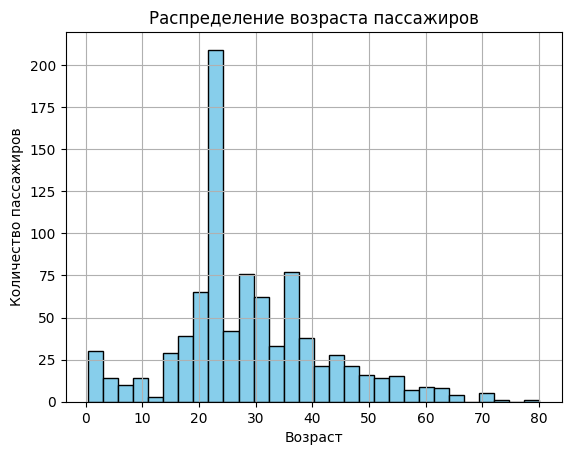

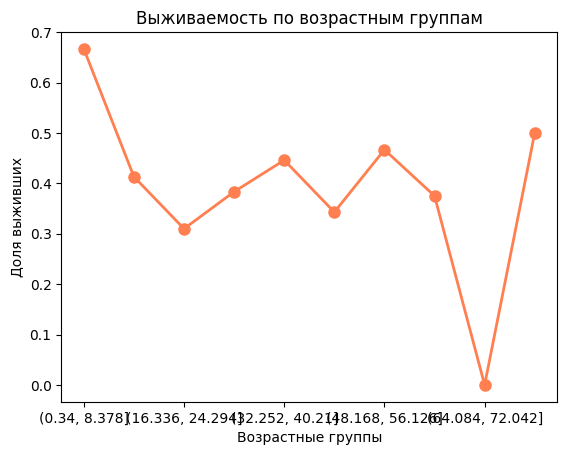

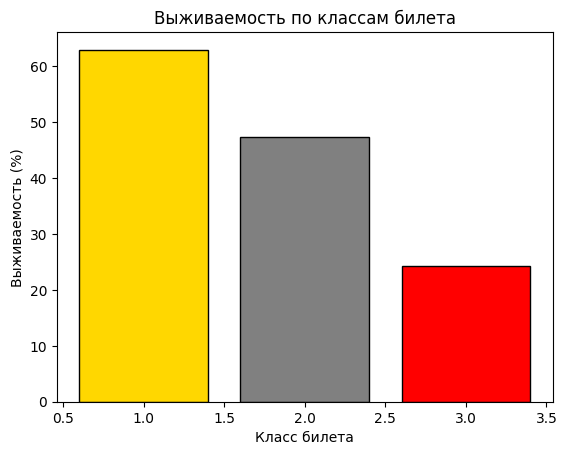

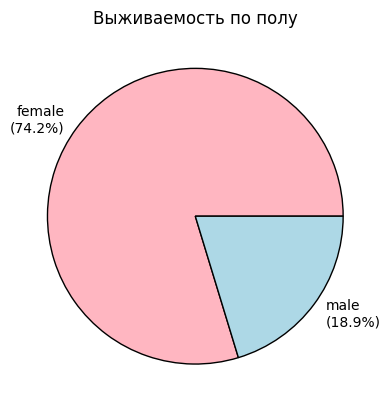

<Figure size 640x480 with 0 Axes>

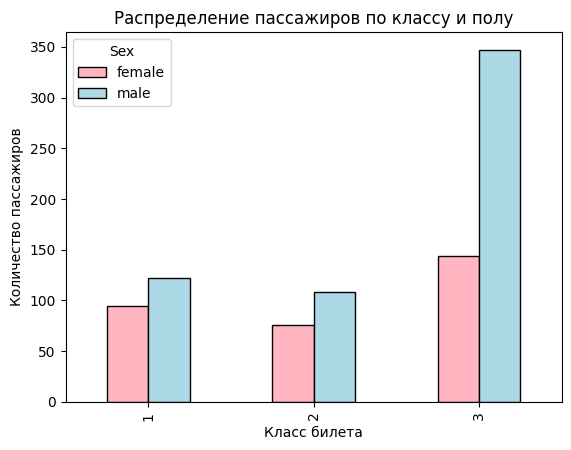

In [11]:
# Описательная статистика
print("Описательная статистика для числовых столбцов:")
print(df.describe())

plt.figure()
df['Age'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

plt.figure()
age_survival = df.groupby(pd.cut(df['Age'], bins=10))['Survived'].mean()
age_survival.plot(kind='line', marker='o', linewidth=2, markersize=8, color='coral')
plt.title('Выживаемость по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Доля выживших')
plt.show()

plt.figure()
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
bars = plt.bar(survival_by_class.index, survival_by_class.values,
               color=['Gold', 'Grey', 'Red'], edgecolor='black')

plt.title('Выживаемость по классам билета')
plt.xlabel('Класс билета')
plt.ylabel('Выживаемость (%)')
plt.show()

plt.figure()
survival_by_gndr = df.groupby('Sex')['Survived'].mean() * 100
colors = ['lightpink', 'lightblue']
wedges, texts, autotexts = plt.pie(
    survival_by_gndr.values,
    labels=[f'{label}\n({value:.1f}%)' for label, value in zip(survival_by_gndr.index, survival_by_gndr.values)],
    autopct='',
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Выживаемость по полу')
plt.show()

plt.figure()
count_by_class_sex = df.groupby(['Pclass', 'Sex']).size().unstack()
count_by_class_sex.plot(kind='bar', color=['lightpink', 'lightblue'], edgecolor='black')
plt.title('Распределение пассажиров по классу и полу')
plt.xlabel('Класс билета')
plt.ylabel('Количество пассажиров')
plt.show()